# Suplementos e Experimentos

1001-Experiments cria suplementos personalizados voltados às necessidades individuais de saúde.

O objetivo da 1001-Experiments é melhorar a saúde pessoal utilizando dados de dispositivos vestíveis (wearables) e aplicativos de saúde.

Esses dados, combinados com o feedback dos usuários e seus hábitos, são usados para analisar e aperfeiçoar a eficácia dos suplementos fornecidos, por meio de diversos pequenos experimentos.

A equipe de engenharia de dados da 1001-Experiments desempenha um papel essencial ao garantir que os dados de saúde e atividade coletados de milhares de usuários sejam organizados com precisão e integrados aos dados de uso dos suplementos.

Essa integração ajuda a 1001-Experiments a fornecer recomendações de saúde e bem-estar mais direcionadas e a aprimorar as formulações dos suplementos.

#Tarefa

A 1001-Experiments atualmente possui os seguintes quatro conjuntos de dados com quatro meses de informações:

*   "user_health_data.csv": registra métricas diárias de saúde, hábitos e dados coletados de dispositivos vestíveis;
*   "supplement_usage.csv": armazena detalhes sobre o consumo de suplementos por usuário;
*   "experiments.csv": contém metadados sobre os experimentos realizados;
*   "user_profiles.csv": possui informações demográficas e de contato dos usuários.

Cada conjunto de dados contém identificadores únicos para os usuários e/ou seus regimes de suplementação.

Atualmente, os desenvolvedores e cientistas de dados mantêm códigos que cruzam essas fontes de dados separadamente, o que é trabalhoso e propenso a erros.

Seu gerente solicitou que você escreva uma função Python que limpe e una esses conjuntos de dados em um único DataFrame.

O dataset final deve fornecer uma visão abrangente das métricas de saúde, uso de suplementos e informações demográficas de cada usuário.

* Para testar seu código, seu gerente executará apenas o comando: merge_all_data('user_health_data.csv', 'supplement_usage.csv', 'experiments.csv', 'user_profiles.csv')
* Sua função merge_all_data deve retornar um DataFrame, com as colunas exatamente conforme descritas abaixo.
* Todos os nomes de colunas devem corresponder com precisão às descrições fornecidas, incluindo os nomes.










# Dados

Os dados fornecidos estão estruturados da seguinte forma:

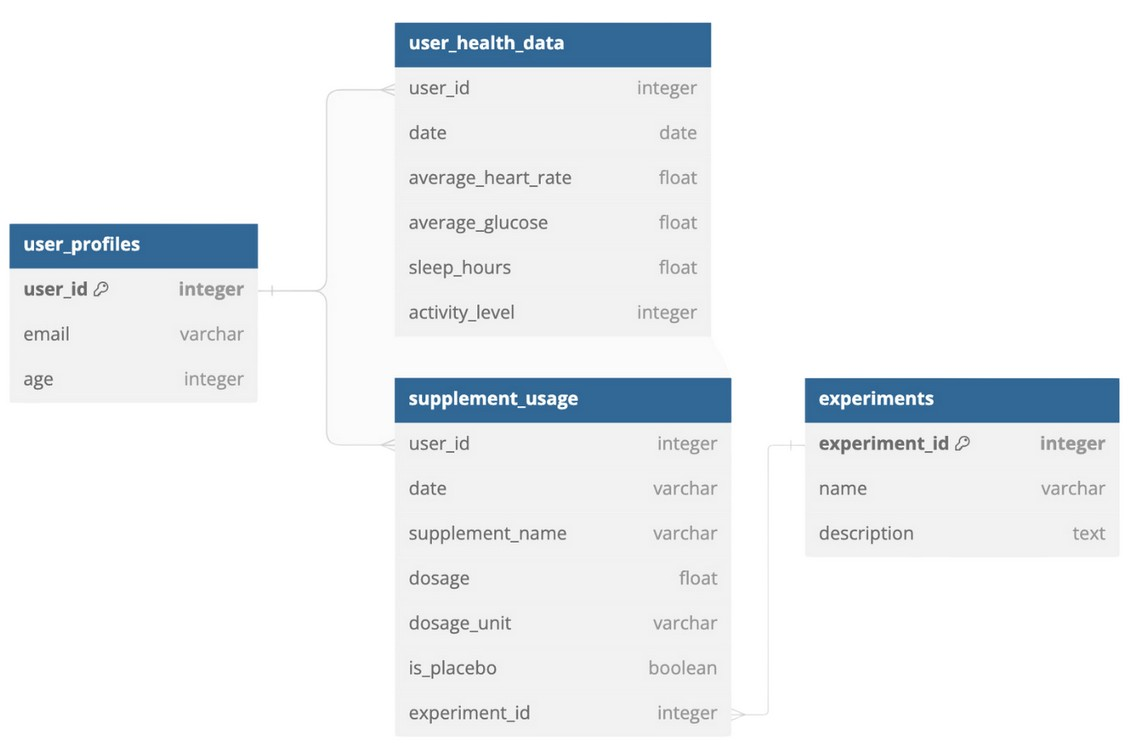

A função que você escrever deve retornar os dados conforme descrito abaixo.

Deve haver uma linha única para cada entrada diária, combinando as métricas de saúde e o uso de suplementos.

Quando valores ausentes forem permitidos, eles devem estar no formato padrão do Python (NaN, None etc.), a menos que seja especificado de outra forma.

| Nome da Coluna           | Descrição                                                                                                                                                                                               |
| ------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **user\_id**             | Identificador único de cada usuário. </br>Não deve haver valores ausentes.                                                                                                                              |
| **date**                 | A data em que os dados de saúde foram registrados ou o suplemento foi ingerido, no formato de data. </br>Não deve haver valores ausentes.                                                               |
| **email**                | E-mail de contato do usuário. </br>Não deve haver valores ausentes.                                                                                                                                     |
| **user\_age\_group**     | Faixa etária do usuário, sendo uma das opções: 'Under 18' (Menor de 18), '18-25', '26-35', '36-45', '46-55', '56-65', 'Over 65' (Acima de 65) ou 'Unknown' (Desconhecido), caso a idade esteja ausente. |
| **experiment\_name**     | Nome do experimento associado ao uso do suplemento. </br>É permitido ter valores ausentes para usuários que possuem apenas dados de saúde.                                                              |
| **supplement\_name**     | Nome do suplemento ingerido naquele dia. Entradas múltiplas são permitidas. </br>Dias sem ingestão de suplemento devem ser codificados como `'No intake'`.                                              |
| **dosage\_grams**        | Dosagem do suplemento ingerido, em gramas. Quando registrada em miligramas (mg), deve ser convertida dividindo por 1000. </br>Valores ausentes são permitidos em dias sem ingestão.                     |
| **is\_placebo**          | Indicador se o suplemento era placebo (`true` ou `false`). </br>Valores ausentes são permitidos em dias sem ingestão.                                                                                   |
| **average\_heart\_rate** | Frequência cardíaca média registrada pelo dispositivo vestível. </br>Valores ausentes são permitidos.                                                                                                   |
| **average\_glucose**     | Nível médio de glicose registrado pelo dispositivo vestível. </br>Valores ausentes são permitidos.                                                                                                      |
| **sleep\_hours**         | Total de horas de sono da noite anterior ao registro do dia atual. </br>Valores ausentes são permitidos.                                                                                                |
| **activity\_level**      | Nível de atividade em uma escala de 0 a 100. </br>Valores ausentes são permitidos.                                                                                                                      |


In [ ]:
import pandas as pd
import numpy as np

def merge_all_data(user_health_file, supplement_usage_file, experiments_file, user_profiles_file):

    # Carregar arquivos CSV usando argumentos da função
    user_profiles_df = pd.read_csv('user_profiles.csv')
    user_health_data_df = pd.read_csv('user_health_data.csv')
    supplement_usage_df = pd.read_csv('supplement_usage.csv')
    experiments_df = pd.read_csv('experiments.csv')

    # Converter colunas de data para datetime
    user_health_data_df['date'] = pd.to_datetime(user_health_data_df['date'])
    supplement_usage_df['date'] = pd.to_datetime(supplement_usage_df['date'])

    # Limpar e padronizar campos de string em supplement_usage
    supplement_usage_df['supplement_name'] = supplement_usage_df['supplement_name'].astype(str).str.strip().str.title()
    supplement_usage_df['dosage_unit'] = supplement_usage_df['dosage_unit'].astype(str).str.strip().str.lower()

    # Padronizar o campo is_placebo
    supplement_usage_df['is_placebo'] = (
        supplement_usage_df['is_placebo']
        .astype(str)
        .str.strip()
        .str.lower()
        .map({'true': True, 'false': False, 'nan': np.nan})
    )

    # Unir conjuntos de dados
    merged_df = pd.merge(user_health_data_df, user_profiles_df, on='user_id', how='left')
    merged_df = pd.merge(merged_df, supplement_usage_df, on=['user_id', 'date'], how='left')
    merged_df = pd.merge(merged_df, experiments_df, on='experiment_id', how='left')

    # Criar grupo de idade do usuário
    bins = [0, 17, 25, 35, 45, 55, 65, float('inf')]
    labels = ['Menor de 18', '18-25', '26-35', '36-45', '46-55', '56-65', 'Mais de 65']
    merged_df['user_age_group'] = pd.cut(merged_df['age'], bins=bins, labels=labels, right=True)
    merged_df['user_age_group'] = merged_df['user_age_group'].astype(str).replace('nan', 'Desconhecido')
    merged_df.drop('age', axis=1, inplace=True)

    # Converter dosagem para gramas
    def convert_to_grams(row):
        if pd.isna(row['dosage']):
            return np.nan
        if row['dosage_unit'] == 'mg':
            return row['dosage'] / 1000
        if row['dosage_unit'] == 'g':
            return row['dosage']
        return np.nan

    merged_df['dosage_grams'] = merged_df.apply(convert_to_grams, axis=1)

    # Limpar e converter sleep_hours
    merged_df['sleep_hours'] = merged_df['sleep_hours'].astype(str).str.replace('[hH]', '', regex=True)
    merged_df['sleep_hours'] = pd.to_numeric(merged_df['sleep_hours'], errors='coerce')

    # Renomear coluna de nome do experimento e remover descrição
    merged_df.rename(columns={'name': 'experiment_name'}, inplace=True)
    merged_df.drop('description', axis=1, inplace=True, errors='ignore')

    # Lidar com uso de suplemento ausente
    merged_df['supplement_name'] = merged_df['supplement_name'].replace('nan', np.nan)
    merged_df['supplement_name'] = merged_df['supplement_name'].fillna('Nenhuma ingestão')
    merged_df['dosage_grams'] = merged_df['dosage_grams'].where(merged_df['supplement_name'] != 'Nenhuma ingestão', np.nan)
    merged_df['is_placebo'] = merged_df['is_placebo'].where(merged_df['supplement_name'] != 'Nenhuma ingestão', np.nan)

    # Seleção final de colunas
    final_columns = [
        'user_id', 'date', 'email', 'user_age_group', 'experiment_name',
        'supplement_name', 'dosage_grams', 'is_placebo',
        'average_heart_rate', 'average_glucose', 'sleep_hours', 'activity_level'
    ]

    final_df = merged_df[final_columns]

    return final_df